# Predicting currency exchange rate (Nigerian Naira vs British Pounds) using linear and polynomial regression

We've cleaned the dataset from the Central Bank of Nigeria.

We can use make some predictions using machine learning models.

In this notebook, we'll use linear and polynomial regression.

# Import relevant libraries

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
sns.set_theme(style="ticks")

# Let's import the cleaned data (average year rate)

In [2]:
df = pd.read_csv("average_year_rate_GBP_to_NGN_2001-2020.csv")

In [3]:
#df = df[10:]

In [4]:
df.head()

,rate_year,buying_rate
0,2001,161.940985
1,2002,180.506688
2,2003,209.806118
3,2004,242.742668
4,2005,237.747661


In [5]:
year = df["rate_year"]

# Initial visualisation

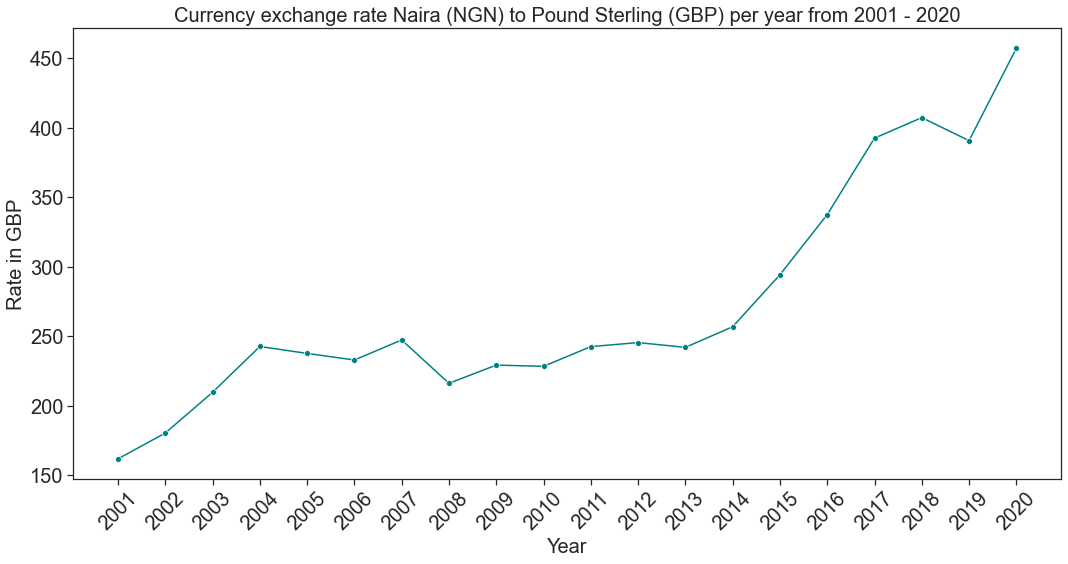

In [6]:
fig, ax = plt.subplots(figsize=(15,8))

sns.lineplot(data=df, x="rate_year", y="buying_rate", color="teal", marker="o")

plt.title("Currency exchange rate Naira (NGN) to Pound Sterling (GBP) per year from 2001 - 2020", fontsize=20) 
plt.ylabel("Rate in GBP", fontsize=20)
plt.xlabel("Year", fontsize=20)
plt.xticks(ticks=year, rotation = 45)
#plt.ylim(0,500)
#plt.xlim(2011,2020)
plt.tick_params(labelsize=20) 
plt.tight_layout()

In [7]:
X = df[["rate_year"]]
y = df["buying_rate"]

In [8]:
X.head()

,rate_year
0,2001
1,2002
2,2003
3,2004
4,2005


In [9]:
y.head()

0    161.940985
1    180.506688
2    209.806118
3    242.742668
4    237.747661
Name: buying_rate, dtype: float64

# Let's split the dataset into the training and testing groups


In [10]:
n= int(len(df) * 0.8) 

X_train = X[:n]
y_train = y[:n]

X_test = X[n:]
y_test = y[n:]

#We use the first 80% for training and the final 20% for testing

# Linear regression

In [11]:
from sklearn.linear_model import LinearRegression 

LinReg = LinearRegression()

# Let's fit the linear regression model to the training data 

In [12]:
LinReg.fit(X_train, y_train)

LinearRegression()

# Let's visualise the linear regression on the training set (2001 - 2016)

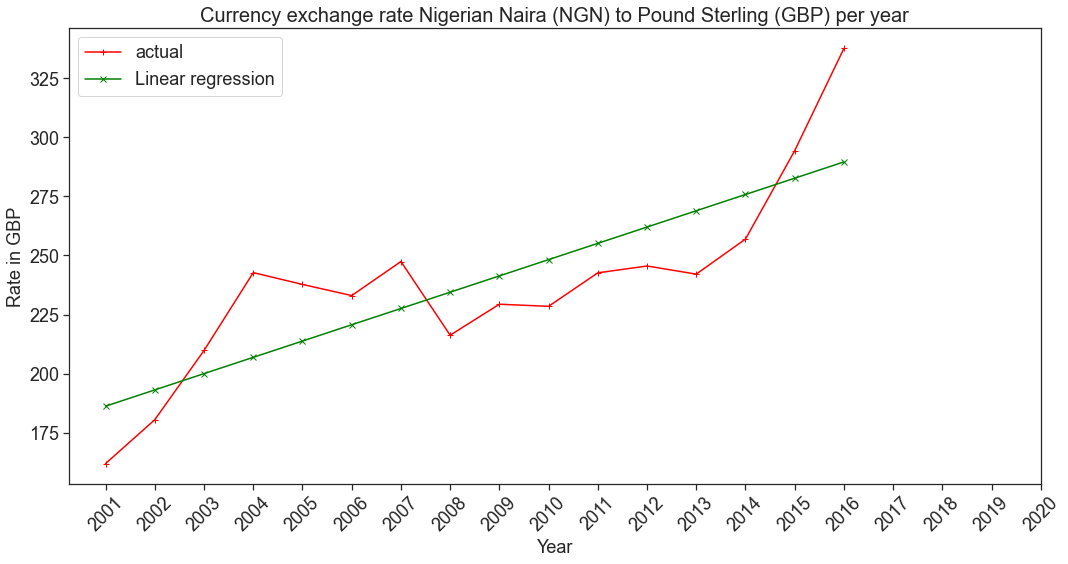

In [13]:
fig, ax = plt.subplots(figsize=(15,8))

plt.plot(X_train, y_train, color="red", marker="+", label="actual")  
plt.plot(X_train,LinReg.predict(X_train), color="green", marker="x", label="Linear regression") 
plt.title("Currency exchange rate Nigerian Naira (NGN) to Pound Sterling (GBP) per year", fontsize=20) 
plt.ylabel("Rate in GBP", fontsize=18)
plt.xlabel("Year", fontsize=18)
plt.xticks(ticks=year, rotation = 45)
plt.tick_params(labelsize=18) 
plt.tight_layout()
plt.legend(loc="best", fontsize=18)

# Predictions with linear regression (test set)

In [14]:
y_predict_lr = LinReg.predict(X_test)

In [15]:
print(y_test)

16    392.530362
17    407.270215
18    390.736814
19    457.157542
Name: buying_rate, dtype: float64


In [16]:
print(y_predict_lr)

[296.48407089 303.37566314 310.2672554  317.15884765]


# Let's evaluate the accuracy of the linear regression model 

In [17]:
from sklearn.metrics import mean_squared_error #to evaluate our accuracy of the model
from math import sqrt #square root

In [18]:
rmse_lr = sqrt(mean_squared_error(y_predict_lr,y_test))
print(rmse_lr)

107.3475110259523


In [19]:
y_test_mean = y_test.mean()

In [20]:
round((rmse_lr/y_test_mean * 100), ndigits=0)

26.0

The rmse should be very significantly smaller than the mean of the test set. 
This means that - On average, our linear regression model predictions are off by about 26%. 

# Let's add polynomial term(s) to the linear regression model

In [21]:
from sklearn.preprocessing import PolynomialFeatures

polynom = PolynomialFeatures(degree=3)
X_polynom = polynom.fit_transform(X_train) #

In [22]:
#this shows the degrees of the X values until degree^n

X_polynom

array([[1.00000000e+00, 2.00100000e+03, 4.00400100e+06, 8.01200600e+09],
       [1.00000000e+00, 2.00200000e+03, 4.00800400e+06, 8.02402401e+09],
       [1.00000000e+00, 2.00300000e+03, 4.01200900e+06, 8.03605403e+09],
       [1.00000000e+00, 2.00400000e+03, 4.01601600e+06, 8.04809606e+09],
       [1.00000000e+00, 2.00500000e+03, 4.02002500e+06, 8.06015012e+09],
       [1.00000000e+00, 2.00600000e+03, 4.02403600e+06, 8.07221622e+09],
       [1.00000000e+00, 2.00700000e+03, 4.02804900e+06, 8.08429434e+09],
       [1.00000000e+00, 2.00800000e+03, 4.03206400e+06, 8.09638451e+09],
       [1.00000000e+00, 2.00900000e+03, 4.03608100e+06, 8.10848673e+09],
       [1.00000000e+00, 2.01000000e+03, 4.04010000e+06, 8.12060100e+09],
       [1.00000000e+00, 2.01100000e+03, 4.04412100e+06, 8.13272733e+09],
       [1.00000000e+00, 2.01200000e+03, 4.04814400e+06, 8.14486573e+09],
       [1.00000000e+00, 2.01300000e+03, 4.05216900e+06, 8.15701620e+09],
       [1.00000000e+00, 2.01400000e+03, 4.05619600e

In [23]:
X_train

,rate_year
0,2001
1,2002
2,2003
3,2004
4,2005
5,2006
6,2007
7,2008
8,2009
9,2010


# Let's fit the polynomial regression model to the training data 

In [24]:
PolyReg = LinearRegression()
PolyReg.fit(X_polynom, y_train)

LinearRegression()

# Let's visualise the polynomial regression on the training set (2001 - 2016)


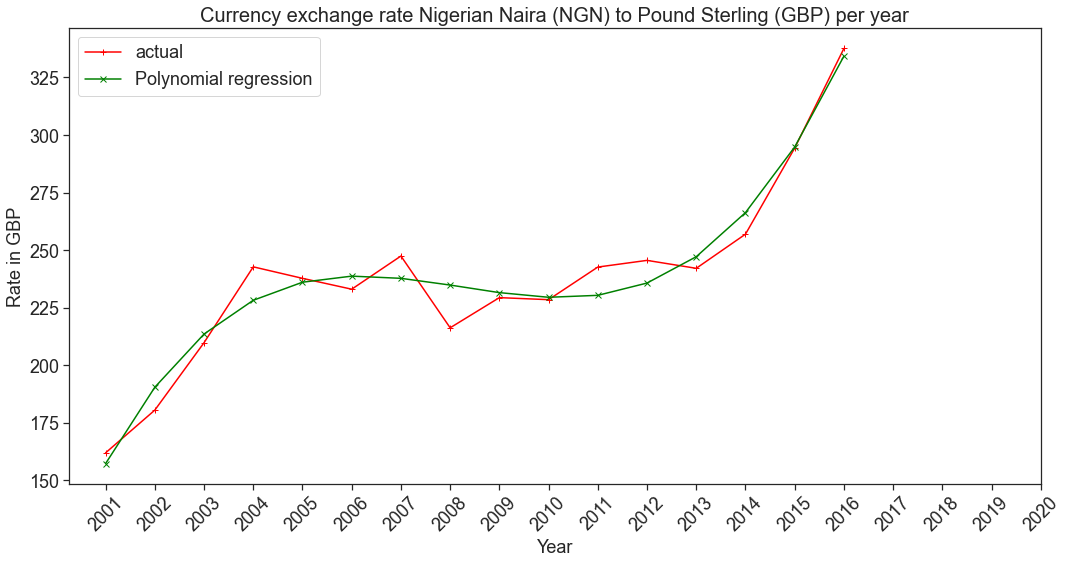

In [25]:
fig, ax = plt.subplots(figsize=(15,8))

plt.plot(X_train, y_train, color="red", marker="+", label="actual")  
plt.plot(X_train,PolyReg.predict(polynom.fit_transform(X_train)), color="green", marker="x", label="Polynomial regression") 
plt.title("Currency exchange rate Nigerian Naira (NGN) to Pound Sterling (GBP) per year", fontsize=20) 
plt.ylabel("Rate in GBP", fontsize=18)
plt.xlabel("Year", fontsize=18)
plt.xticks(ticks=year, rotation = 45)
plt.tick_params(labelsize=18) 
plt.tight_layout()
plt.legend(loc="best", fontsize=18)

# Predictions with polynomial regression (test set)

In [26]:
y_predict_pr = PolyReg.predict(polynom.fit_transform(X_test))

In [27]:
y_predict_pr

array([386.27731419, 452.48380041, 534.49101257, 633.91485739])

# Let's evaluate the accuracy of the polynomial regression model 

In [28]:
rmse_pr = sqrt(mean_squared_error(y_predict_pr,y_test))
print(rmse_pr)

116.1806640246469


In [29]:
round((rmse_pr/y_test_mean * 100), ndigits=0)

28.0

The rmse should be very significantly smaller than the mean of the test set. 
This means that - On average, our polynomial regression model predictions are off by about 28%. 

# Let's visualise the models on the full dataset (using model trained on train data)

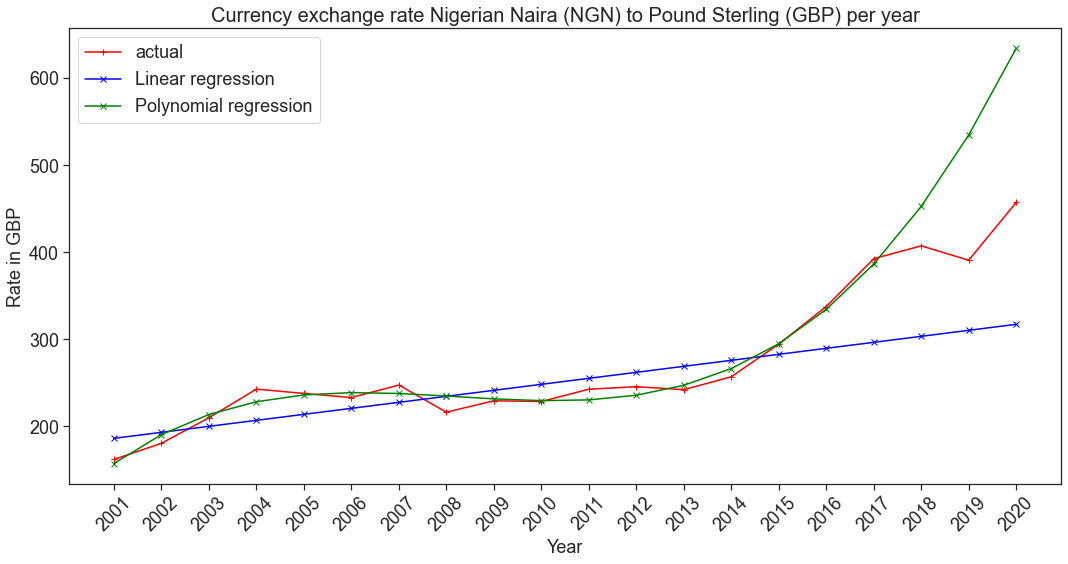

In [30]:
fig, ax = plt.subplots(figsize=(15,8))

plt.plot(X, y, color="red", marker="+", label="actual")  
plt.plot(X,LinReg.predict(X), color="blue", marker="x", label="Linear regression") 
plt.plot(X,PolyReg.predict(polynom.fit_transform(X)), color="green", marker="x", label="Polynomial regression") 
plt.title("Currency exchange rate Nigerian Naira (NGN) to Pound Sterling (GBP) per year", fontsize=20) 
plt.ylabel("Rate in GBP", fontsize=18)
plt.xlabel("Year", fontsize=18)
plt.xticks(ticks=year, rotation = 45)
plt.tick_params(labelsize=18) 
plt.tight_layout()
plt.legend(loc="best", fontsize=18)

# Let's make predictions for the next five years


In [31]:
future_years = pd.DataFrame(np.array([2021,2022,2023,2024,2025]),
                     columns=["rate_year"]
                     )

In [32]:
future_years

,rate_year
0,2021
1,2022
2,2023
3,2024
4,2025


In [33]:
LinReg.predict(future_years)

array([324.0504399 , 330.94203216, 337.83362441, 344.72521666,
       351.61680892])

In [34]:
PolyReg.predict(polynom.fit_transform(future_years))

array([ 752.371243  ,  891.47607803, 1052.8452692 , 1238.09472513,
       1448.84035206])

# Further exercise (using model trained on the full dataset before making the 5-year prediction)

In [35]:
LinReg.fit(X, y)

LinearRegression()

In [36]:
PolyReg.fit(polynom.fit_transform(X), y)

LinearRegression()

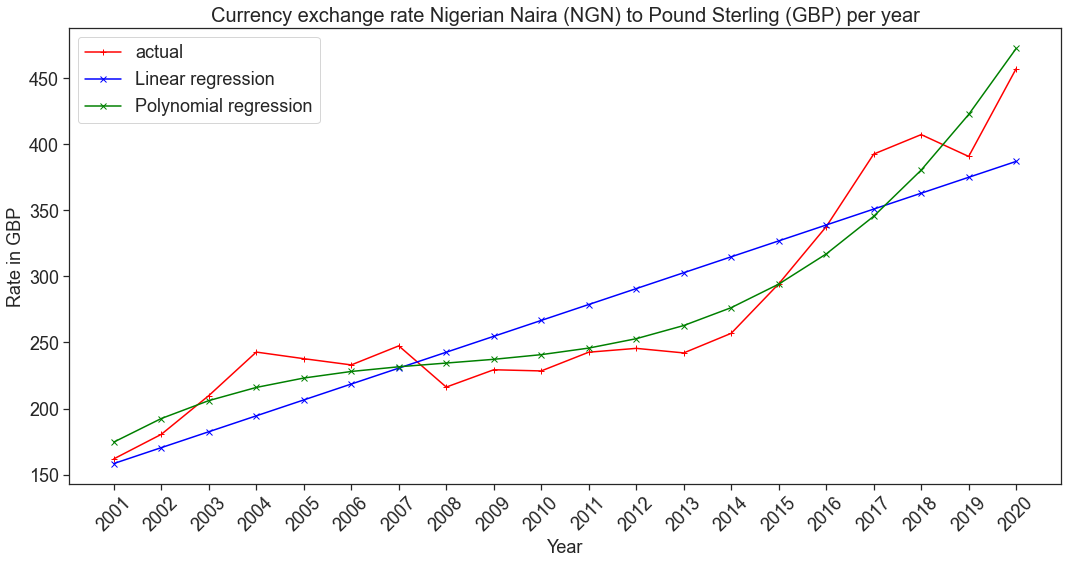

In [37]:
fig, ax = plt.subplots(figsize=(15,8))

plt.plot(X, y, color="red", marker="+", label="actual")  
plt.plot(X,LinReg.predict(X), color="blue", marker="x", label="Linear regression") 
plt.plot(X,PolyReg.predict(polynom.fit_transform(X)), color="green", marker="x", label="Polynomial regression") 
plt.title("Currency exchange rate Nigerian Naira (NGN) to Pound Sterling (GBP) per year", fontsize=20) 
plt.ylabel("Rate in GBP", fontsize=18)
plt.xlabel("Year", fontsize=18)
plt.xticks(ticks=year, rotation = 45)
plt.tick_params(labelsize=18) 
plt.tight_layout()
plt.legend(loc="best", fontsize=18)

In [38]:
LinReg.predict(future_years)

array([399.03124559, 411.06191888, 423.09259216, 435.12326545,
       447.15393873])

In [39]:
PolyReg.predict(polynom.fit_transform(future_years))

array([530.92534006, 598.70254564, 676.47392976, 764.95345676,
       864.85509002])

In [40]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(LinReg, X, y,
                              cv=5,
                              scoring="neg_mean_squared_error")

print("Average RMSE score:", sqrt(scores.mean()))

Average RMSE score: 64.10498740419867


In [41]:
# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(PolyReg, X, y,
                              cv=5,
                              scoring="neg_mean_squared_error")

print("Average RMSE score:", sqrt(scores.mean()))

Average RMSE score: 64.10498740419867


# Further Excercise - Random Forest (Trial)

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train_rd, X_test_rd, y_train_rd, y_test_rd = train_test_split(X, y, test_size=0.2, random_state=0)

In [45]:
rdm = RandomForestRegressor()

In [46]:
rdm.fit(X_train_rd, y_train_rd)

RandomForestRegressor()

In [47]:
y_pred_rd = rdm.predict(X_test_rd)

In [48]:
print(y_test_rd)
print(y_pred_rd)

18    390.736814
1     180.506688
19    457.157542
8     229.366047
Name: buying_rate, dtype: float64
[387.81276155 187.06443841 387.81276155 221.29235097]


In [49]:
rmse_rd = sqrt(mean_squared_error(y_pred_rd,y_test_rd))
print(rmse_rd)

35.090730198374224


In [50]:
y_test_rd.mean()

314.4417728989813

In [51]:
round((rmse_rd/y_test_rd.mean() * 100), ndigits=0)

11.0

In [52]:
prediction_rd = rdm.predict(X)
print(prediction_rd)

[187.06443841 187.06443841 214.65081961 233.84280175 237.75438407
 235.27119843 241.34248058 225.92843691 221.29235097 229.88968615
 239.96953429 243.87886105 244.97232115 258.02153081 287.82303906
 330.33390698 372.96780908 387.81276155 387.81276155 387.81276155]


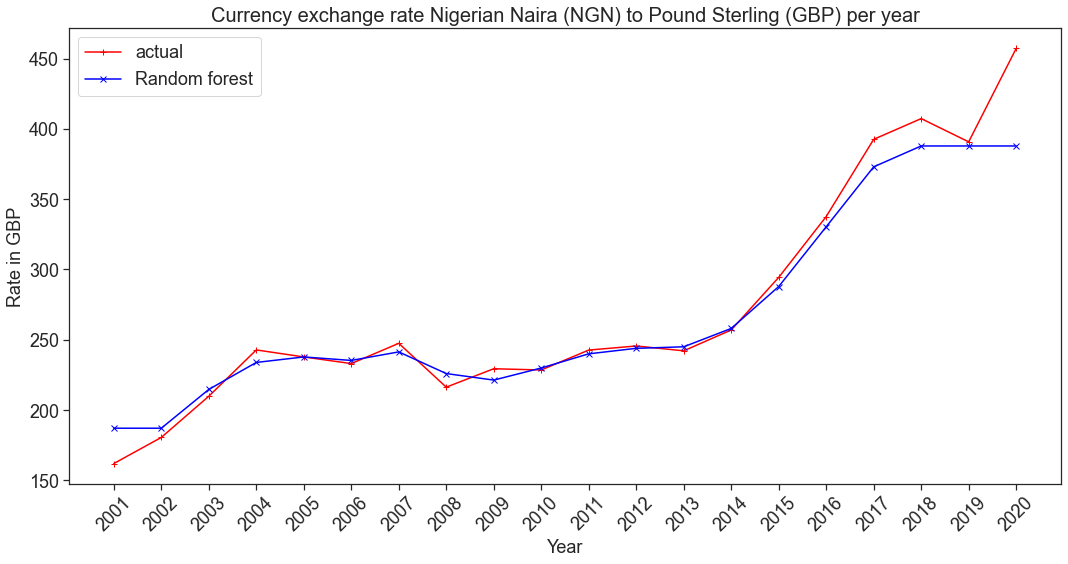

In [53]:
fig, ax = plt.subplots(figsize=(15,8))

plt.plot(X, y, color="red", marker="+", label="actual")  
plt.plot(X,prediction_rd, color="blue", marker="x", label="Random forest")
plt.title("Currency exchange rate Nigerian Naira (NGN) to Pound Sterling (GBP) per year", fontsize=20) 
plt.ylabel("Rate in GBP", fontsize=18)
plt.xlabel("Year", fontsize=18)
plt.xticks(ticks=year, rotation = 45)
plt.tick_params(labelsize=18) 
plt.tight_layout()
plt.legend(loc="best", fontsize=18)

# Major Issue - random forest did not predict out of range values 

In [54]:
rdm.predict(future_years)

array([387.81276155, 387.81276155, 387.81276155, 387.81276155,
       387.81276155])